In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

%matplotlib inline

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url,index_col=False)
boston_df.drop('Unnamed: 0',axis=1, inplace = True)

In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


### Data understanding

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

# Descriptive Statistics and Visualizations

### Boxplot for Median value of owner-occupied homes

Text(0.5, 1.0, 'Boxplot for owner-occupied homes')

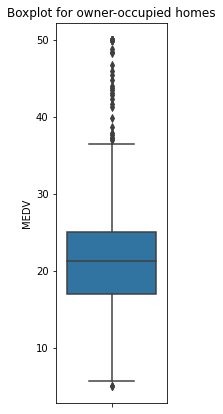

In [11]:
plt.figure(figsize=(2,7))
ax = sns.boxplot(y="MEDV", data= boston_df)
ax.set_title("Boxplot for owner-occupied homes")

### Bar plot for Charles river variable

Text(0.5, 1.0, 'Bar plot for Charles river variable')

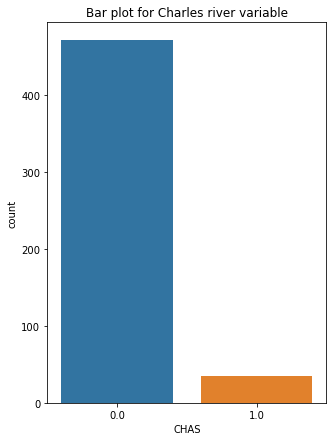

In [13]:
plt.figure(figsize=(5,7))
ax = sns.countplot(x='CHAS', data=boston_df)
ax.set_title("Bar plot for Charles river variable")

### Boxplot for the MEDV variable vs the AGE variable (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [14]:
# creating age groups
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '70 years and older'

Text(0.5, 1.0, 'Boxplot for the MEDV variable vs the AGE variable')

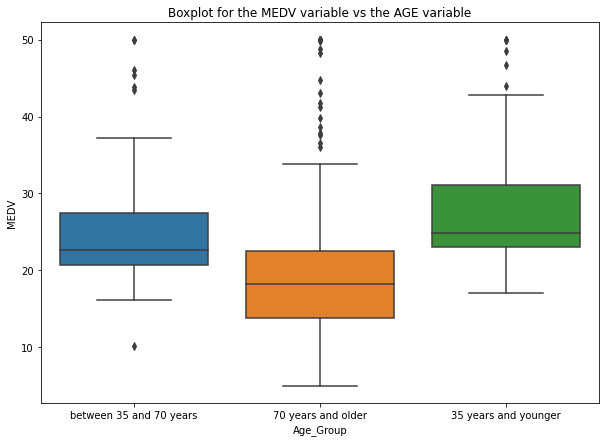

In [18]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(x="Age_Group", y='MEDV', data=boston_df)
ax.set_title("Boxplot for the MEDV variable vs the AGE variable")

Above boxplot shows that median of owner occupied house is higher when age is 35 years and lower.

### Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

Text(0.5, 1.0, 'Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town')

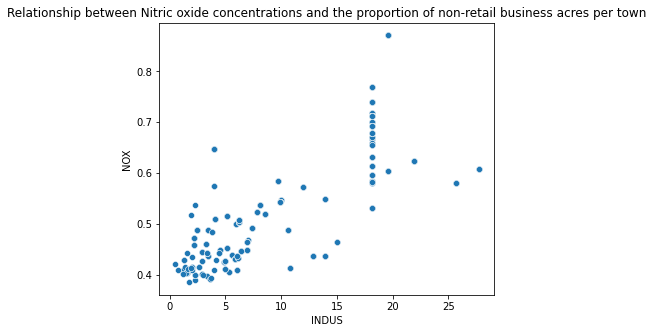

In [25]:
plt.figure(figsize=(6,5))
ax = sns.scatterplot(x="INDUS", y='NOX', data=boston_df)
ax.set_title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town")

Bottom-left section of plot shows a strong relationship between low Nitric oxide concentration and low proportion of non-retail business acres per town.

And a few non-retail business produces medium to high Nitric oxide concentration.

###  Histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram for the pupil to teacher ratio variable')

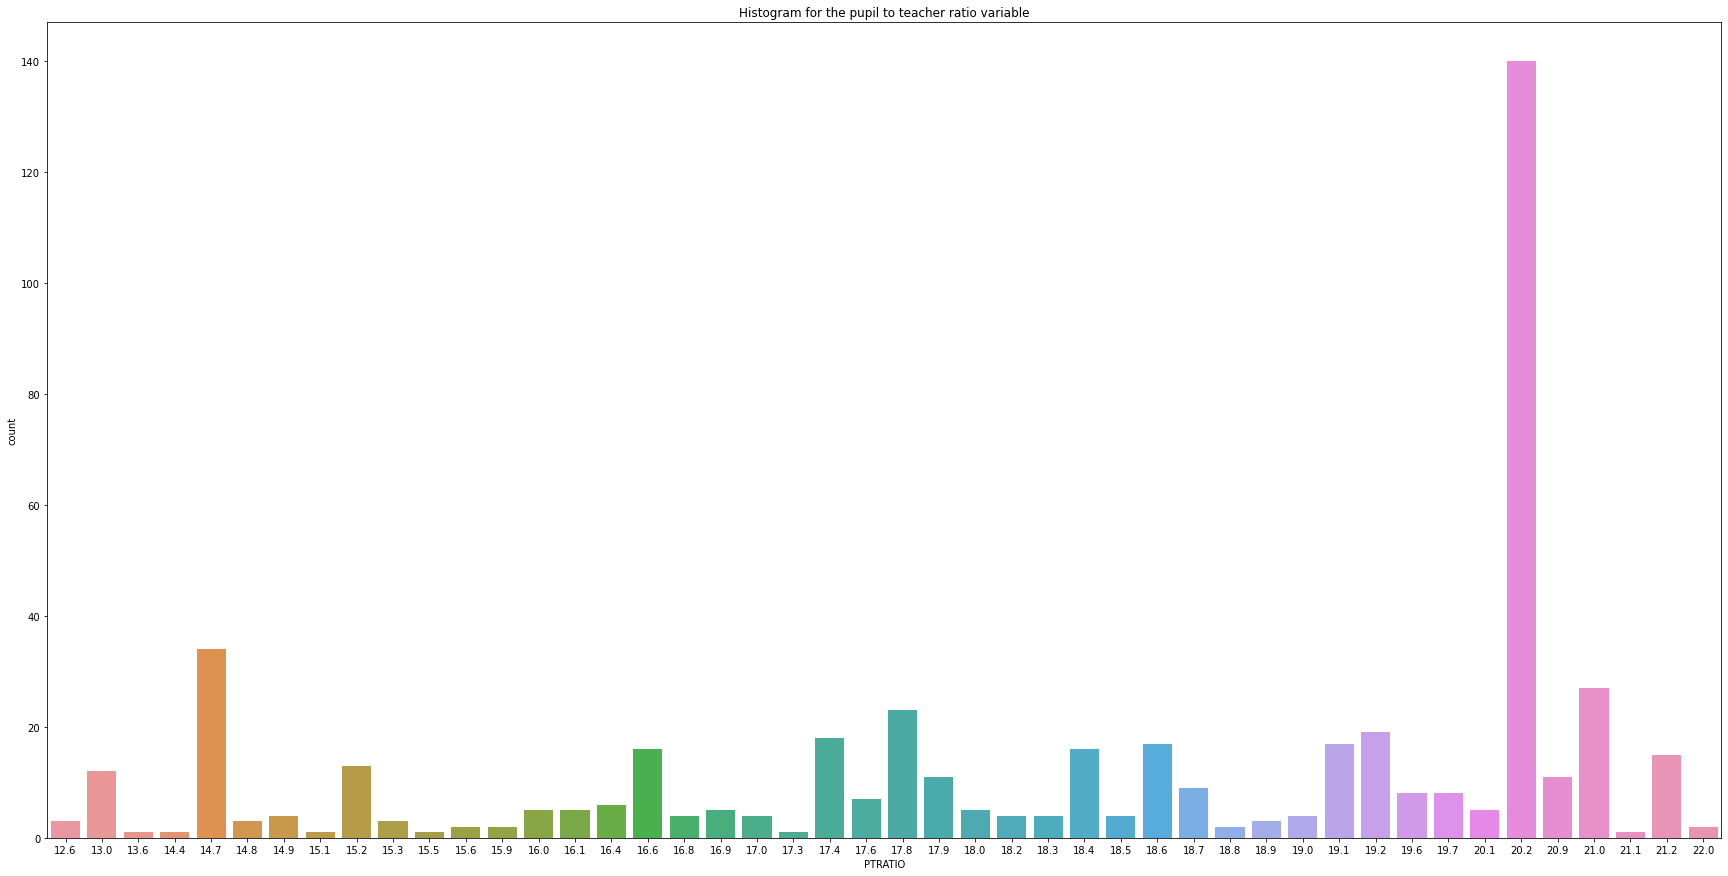

In [30]:
plt.figure(figsize=(30,15))
ax = sns.countplot(x='PTRATIO', data=boston_df)
ax.set_title("Histogram for the pupil to teacher ratio variable")

# Statistical Tests

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis -> There is no significant difference in median value of houses bounded by the Charles river or not bounded

Alternative Hypothesis -> There is a significant difference in median value of houses bounded by the Charles river or not bounded

In [33]:
boston_df.loc[(boston_df['CHAS'] == 0), 'CHAS_Flag'] = 'Not Bounded'
boston_df.loc[(boston_df['CHAS'] == 1), 'CHAS_Flag'] = 'Bounded'

In [36]:
scipy.stats.ttest_ind(boston_df[boston_df.CHAS_Flag == 'Not Bounded']['MEDV'],
                     boston_df[boston_df.CHAS_Flag == 'Bounded']['MEDV'],
                     equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since p-value is lower than alpha = 0.05 we reject the null hypothesis, which means there is a significant difference in median value of houses bounded by the Charles river or not bounded 

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null hypothesis -> There is not a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

Alternative Hypothesis -> There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940

In [45]:
from statsmodels.formula.api import ols
model = ols('MEDV ~ AGE', data = boston_df).fit()
result = sm.stats.anova_lm(model)
print(result)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


As p-value is less than 0.05, we fail to accept the Null Hypothesis.
There is a difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis -> There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Alternative Hypothesis -> There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [48]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

Pearson Coefficient is 0.763 and p-value less than 0.05, we reject the Null Hypothesis as there is a positive correlation between Nitric oxide concentration and proportion of non-retail business acres per town

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [49]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predisction = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        16:00:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes